In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
path = 'Data/IoW_data/'
pois_file = 'gis_osm_pois_a_free_1.shp'
traffic_file = 'gis_osm_traffic_a_free_1.shp'
places_file = 'gis_osm_places_a_free_1.shp'
roads_file = 'gis_osm_roads_free_1.shp'

In [3]:
pois = gpd.read_file(path + pois_file)

In [4]:
pois.head()

,osm_id,code,fclass,name,geometry
0,3580387,2731,castle,Spitbank Fort,"POLYGON ((-1.09927 50.77049, -1.09926 50.77054..."
1,3580387,2401,hotel,Spitbank Fort,"POLYGON ((-1.09927 50.77049, -1.09926 50.77054..."
2,3580388,2737,fort,Horse Sand Fort,"POLYGON ((-1.07277 50.75012, -1.07277 50.75018..."
3,3580389,2737,fort,No Man's Land Fort,"POLYGON ((-1.09538 50.74007, -1.09537 50.74015..."
4,4570983,2204,park,Litten Park,"POLYGON ((-1.29414 50.69695, -1.29390 50.69699..."


In [5]:
pois.shape

(1532, 5)

<AxesSubplot: >

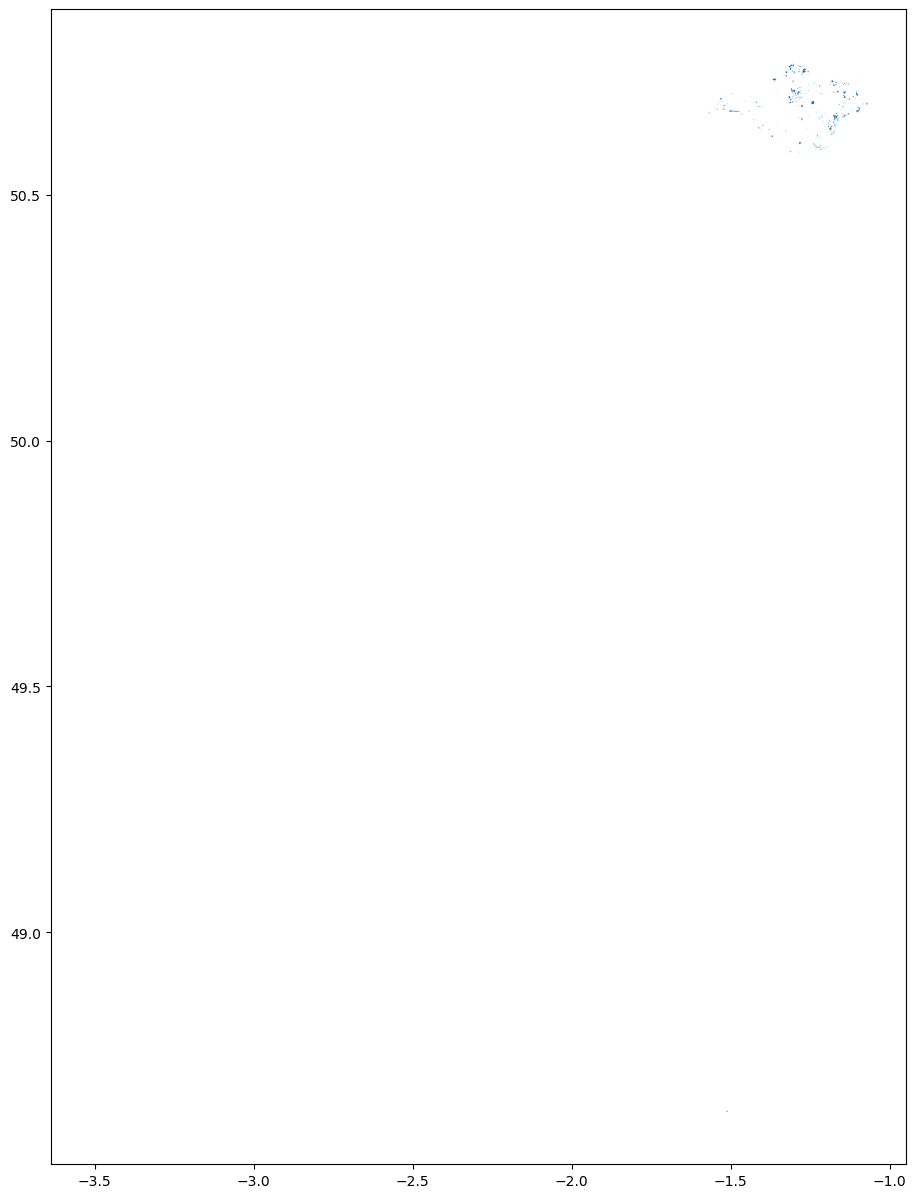

In [6]:
pois.plot(figsize=(15,15))

In [7]:
traffic = gpd.read_file(path + traffic_file)

In [8]:
traffic.head()

,osm_id,code,fclass,name,geometry
0,2922033,5260,parking,Quay Road,"POLYGON ((-1.15767 50.73314, -1.15765 50.73318..."
1,2956982,5260,parking,Fort Victoria,"POLYGON ((-1.52190 50.70627, -1.52181 50.70650..."
2,2970972,5260,parking,NaN,"POLYGON ((-1.16274 50.72928, -1.16270 50.72942..."
3,2970976,5260,parking,St Thomas Street Upper Car Park,"POLYGON ((-1.16367 50.73213, -1.16363 50.73216..."
4,3032737,5260,parking,NaN,"POLYGON ((-1.27919 50.72457, -1.27903 50.72473..."


In [9]:
traffic.shape

(2001, 5)

<AxesSubplot: >

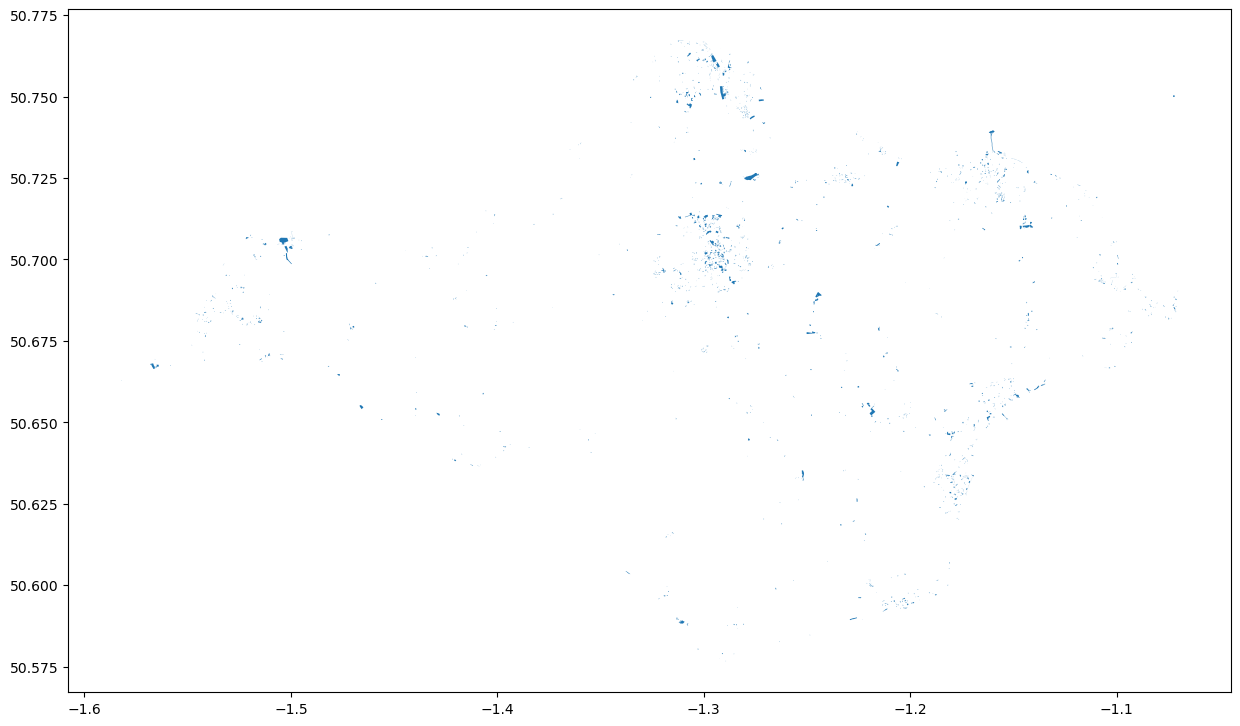

In [10]:
traffic.plot(figsize=(15, 15))

In [11]:
places = gpd.read_file(path + places_file)

In [12]:
places.head()

,osm_id,code,fclass,population,name,geometry
0,2956897,1020,island,0,Herm,"POLYGON ((-2.45794 49.47967, -2.45783 49.47974..."
1,2956937,1020,island,0,Sark,"POLYGON ((-2.38320 49.41380, -2.38319 49.41392..."
2,4537586,1020,island,0,Île-Grande,"POLYGON ((-3.59131 48.80149, -3.59126 48.80154..."
3,4538137,1020,island,507,Île de Batz,"POLYGON ((-4.04027 48.74580, -4.04001 48.74624..."
4,179095084,1050,locality,0,Carrevelec,"POLYGON ((-4.39392 48.66584, -4.39384 48.66607..."


In [13]:
places = places.to_crs('proj=cea')
places['area'] = places.area
places = places.rename(columns={'osm_id': 'place_osm_id',
                                 'code': 'place_code',
                                 'fclass': 'place_fclass',
                                 'name': 'place_name',
                                 'area': 'place_area'})


In [14]:
places = places.sort_values(by=['place_name'])
places.place_name.unique()

array(['Adgestone', 'Appley', 'Arreton', 'Bembridge', 'Blackwater',
       'Calbourne', 'Carisbrooke', 'Carrevelec', 'Downsview', 'Dunsbury',
       'Egypt Point', 'Elmfield', 'Fairlee', 'Freshwater', 'Gatcombe',
       'Godshill', 'Halverstone', 'Havenstreet', 'Herm', 'Island View',
       'Isle of Wight', 'Jubilee', 'Kingsgate', 'Locks Green', 'Luccombe',
       'Meadow View', 'Medina Court', 'Norton Vale', 'Osborne Grove',
       'Puckpool Park', 'Safari Tent', 'Sark', 'Signature Grove',
       'Weavers Yard', 'Whitecroft', "Willett's Cross", 'Woodlands',
       'Île de Batz', 'Île-Grande', nan], dtype=object)

In [15]:
places.loc[6].place_name

nan

In [16]:
not_iow = ["Carrevelec","Herm","Sark","Île de Batz","Île-Grande",np.nan]

<AxesSubplot: >

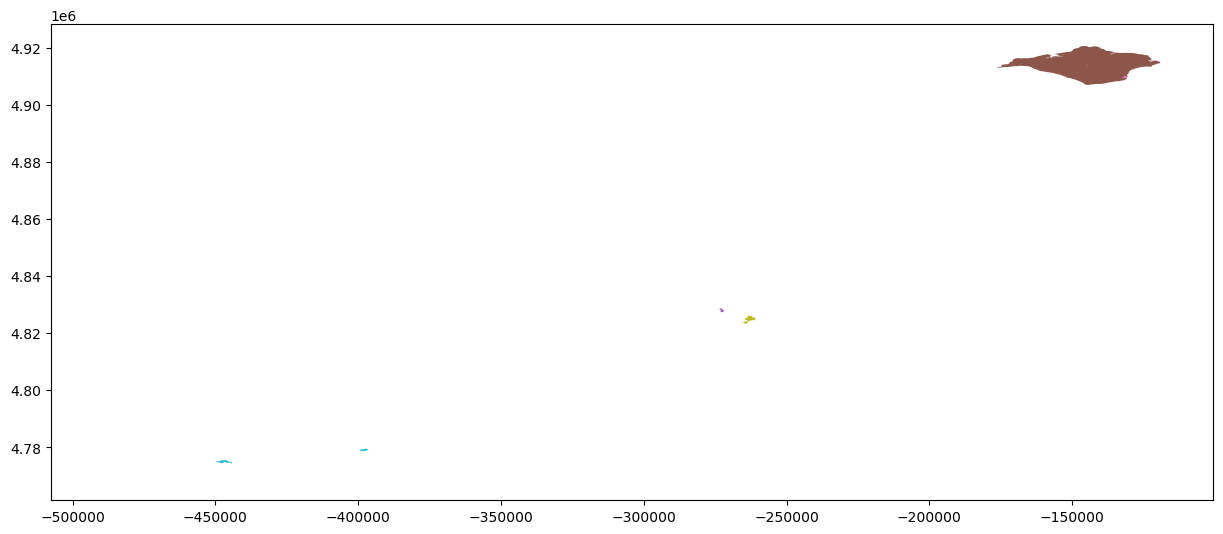

In [17]:
places.plot(figsize=(15, 30), column='place_name')

<AxesSubplot: >

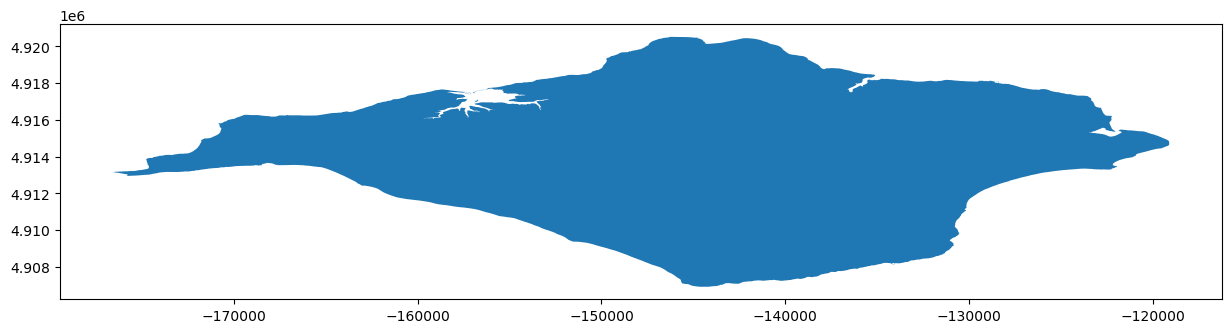

In [18]:
iow = places.loc[~places["place_name"].isin(not_iow)]
iow.plot(figsize=(15, 30))

In [19]:
# Recode Isle of Wight to +proj=cea
iow

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area
10,472751972,1004,hamlet,150,Adgestone,"POLYGON ((-130872.448 4913632.419, -130737.484...",1.316842e+06
15,826927255,1050,locality,0,Appley,"POLYGON ((-132373.558 4910966.115, -132339.650...",7.492107e+03
33,943382141,1050,locality,0,Arreton,"POLYGON ((-131713.945 4911533.032, -131703.737...",1.883537e+03
34,943382142,1050,locality,0,Bembridge,"POLYGON ((-131714.346 4911552.330, -131708.791...",1.653169e+03
21,832891778,1050,locality,0,Blackwater,"POLYGON ((-132180.073 4911035.685, -132107.226...",7.101948e+03
35,943382144,1050,locality,0,Calbourne,"POLYGON ((-131708.791 4911560.855, -131692.160...",2.687380e+03
17,827609133,1050,locality,0,Carisbrooke,"POLYGON ((-132203.217 4911045.725, -132153.947...",2.900449e+03
36,943382146,1050,locality,0,Downsview,"POLYGON ((-131692.160 4911569.366, -131679.648...",3.063501e+03
20,827609136,1050,locality,0,Dunsbury,"POLYGON ((-131935.092 4911061.964, -131906.728...",2.313510e+03
19,827609135,1050,locality,0,Egypt Point,"POLYGON ((-131989.427 4911078.925, -131972.707...",1.944017e+03


#### Traffic Data Augmentation

1. Get boundaries (linestring) of the polygons to enable geopandas sjoin with roads data.
2. Create column to indicate mini-nodes using Traffic data through ranking of polygon shape (these will have to aggregated post join with roads data).

In [20]:
traffic = traffic.to_crs('+proj=cea')
traffic_crs = traffic.crs
traffic_crs

<Derived Projected CRS: +proj=cea +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
traffic['traffic_area'] = traffic.area
traffic['traffic_zones'] = traffic.geometry
traffic = traffic.sort_values(by='traffic_area', ascending=False) # ordering to the get the biggest traffic zones.
traffic.head(8)

,osm_id,code,fclass,name,geometry,traffic_area,traffic_zones
1819,935741779,5302,marina,Island Harbour Marina,"POLYGON ((-142536.582 4917514.544, -142530.537...",50490.134642,"POLYGON ((-142536.582 4917514.544, -142530.537..."
136,149532505,5302,marina,Yarmouth Harbour,"POLYGON ((-167611.475 4916191.446, -167610.440...",45881.147281,"POLYGON ((-167611.475 4916191.446, -167610.440..."
189,205503540,5302,marina,East Cowes Marina,"POLYGON ((-143850.330 4919517.775, -143715.789...",39536.112262,"POLYGON ((-143850.330 4919517.775, -143715.789..."
2000,1087782215,5260,parking,Garlic Festival parking,"POLYGON ((-135782.316 4912432.587, -135648.855...",22730.360299,"POLYGON ((-135782.316 4912432.587, -135648.855..."
1711,707195965,5302,marina,Cowes Yacht Haven,"POLYGON ((-144317.760 4920165.091, -144287.559...",22593.329193,"POLYGON ((-144317.760 4920165.091, -144287.559..."
134,143988133,5303,pier,Ryde Pier,"POLYGON ((-129348.439 4918521.710, -129283.774...",21107.993074,"POLYGON ((-129348.439 4918521.710, -129283.774..."
36,24579157,5260,parking,NaN,"POLYGON ((-174568.799 4913502.683, -174533.856...",14406.777924,"POLYGON ((-174568.799 4913502.683, -174533.856..."
868,486752978,5260,parking,NaN,"POLYGON ((-138643.027 4915010.558, -138580.031...",14291.090540,"POLYGON ((-138643.027 4915010.558, -138580.031..."


In [22]:
traffic.tail(8)

,osm_id,code,fclass,name,geometry,traffic_area,traffic_zones
1107,524361226,5303,pier,NaN,"POLYGON ((-144215.102 4920033.916, -144206.864...",15.304891,"POLYGON ((-144215.102 4920033.916, -144206.864..."
1977,1060515717,5260,parking,NaN,"POLYGON ((-131155.622 4910814.294, -131152.361...",13.053547,"POLYGON ((-131155.622 4910814.294, -131152.361..."
1887,1001093081,5270,parking_bicycle,NaN,"POLYGON ((-130689.583 4911475.256, -130683.071...",12.012853,"POLYGON ((-130689.583 4911475.256, -130683.071..."
1973,1060515713,5260,parking,NaN,"POLYGON ((-131190.064 4910918.773, -131186.703...",10.195328,"POLYGON ((-131190.064 4910918.773, -131186.703..."
1985,1062340180,5260,parking,NaN,"POLYGON ((-131215.378 4910986.817, -131212.328...",8.979139,"POLYGON ((-131215.378 4910986.817, -131212.328..."
1981,1062340175,5260,parking,NaN,"POLYGON ((-131281.680 4910963.146, -131274.589...",8.756938,"POLYGON ((-131281.680 4910963.146, -131274.589..."
1584,664632303,5303,pier,NaN,"POLYGON ((-138663.087 4914229.145, -138661.940...",8.012608,"POLYGON ((-138663.087 4914229.145, -138661.940..."
1191,528327858,5303,pier,NaN,"POLYGON ((-143816.121 4920327.488, -143815.197...",7.193263,"POLYGON ((-143816.121 4920327.488, -143815.197..."


In [23]:
traffic.shape

(2001, 7)

### Points of Interest
1. Get the centroids of the points of interest as the 'node' or central point of that location.

In [24]:
pois = pois.to_crs('+proj=cea')
pois['pois_centroids'] = pois.centroid.to_crs(epsg=4326)
pois['pois_area'] = pois.area
pois.head()

,osm_id,code,fclass,name,geometry,pois_centroids,pois_area
0,3580387,2731,castle,Spitbank Fort,"POLYGON ((-122369.754 4920740.582, -122369.097...",POINT (-1.09895 50.77050),1561.672993
1,3580387,2401,hotel,Spitbank Fort,"POLYGON ((-122369.754 4920740.582, -122369.097...",POINT (-1.09895 50.77050),1561.672993
2,3580388,2737,fort,Horse Sand Fort,"POLYGON ((-119420.600 4919303.954, -119420.232...",POINT (-1.07235 50.75014),2743.804510
3,3580389,2737,fort,No Man's Land Fort,"POLYGON ((-121937.467 4918595.052, -121936.131...",POINT (-1.09490 50.74008),3655.422216
4,4570983,2204,park,Litten Park,"POLYGON ((-144062.594 4915552.517, -144036.712...",POINT (-1.29341 50.69718),11200.390317


In [25]:
pois = pois.rename(columns={'fclass': 'pois_fclass',
                            'name': 'pois_name',
                            'code': 'pois_code'})

In [26]:
pois

,osm_id,pois_code,pois_fclass,pois_name,geometry,pois_centroids,pois_area
0,3580387,2731,castle,Spitbank Fort,"POLYGON ((-122369.754 4920740.582, -122369.097...",POINT (-1.09895 50.77050),1561.672993
1,3580387,2401,hotel,Spitbank Fort,"POLYGON ((-122369.754 4920740.582, -122369.097...",POINT (-1.09895 50.77050),1561.672993
2,3580388,2737,fort,Horse Sand Fort,"POLYGON ((-119420.600 4919303.954, -119420.232...",POINT (-1.07235 50.75014),2743.804510
3,3580389,2737,fort,No Man's Land Fort,"POLYGON ((-121937.467 4918595.052, -121936.131...",POINT (-1.09490 50.74008),3655.422216
4,4570983,2204,park,Litten Park,"POLYGON ((-144062.594 4915552.517, -144036.712...",POINT (-1.29341 50.69718),11200.390317
...,...,...,...,...,...,...,...
1527,1097749421,2252,pitch,NaN,"POLYGON ((-137187.090 4908211.772, -137181.224...",POINT (-1.23189 50.59353),6467.673150
1528,1097749422,2252,pitch,NaN,"POLYGON ((-137198.912 4908166.032, -137196.241...",POINT (-1.23169 50.59272),6764.672050
1529,1104511728,2253,swimming_pool,NaN,"POLYGON ((-143296.182 4907615.463, -143295.447...",POINT (-1.28722 50.58469),16.472612
1530,1116784037,2961,wastewater_plant,Blackwater WTW,"POLYGON ((-142966.064 4913861.798, -142926.634...",POINT (-1.28409 50.67296),439.507367


### Putting together the data for iow, the pois and traffic data within it.

In [27]:
iow

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area
10,472751972,1004,hamlet,150,Adgestone,"POLYGON ((-130872.448 4913632.419, -130737.484...",1.316842e+06
15,826927255,1050,locality,0,Appley,"POLYGON ((-132373.558 4910966.115, -132339.650...",7.492107e+03
33,943382141,1050,locality,0,Arreton,"POLYGON ((-131713.945 4911533.032, -131703.737...",1.883537e+03
34,943382142,1050,locality,0,Bembridge,"POLYGON ((-131714.346 4911552.330, -131708.791...",1.653169e+03
21,832891778,1050,locality,0,Blackwater,"POLYGON ((-132180.073 4911035.685, -132107.226...",7.101948e+03
35,943382144,1050,locality,0,Calbourne,"POLYGON ((-131708.791 4911560.855, -131692.160...",2.687380e+03
17,827609133,1050,locality,0,Carisbrooke,"POLYGON ((-132203.217 4911045.725, -132153.947...",2.900449e+03
36,943382146,1050,locality,0,Downsview,"POLYGON ((-131692.160 4911569.366, -131679.648...",3.063501e+03
20,827609136,1050,locality,0,Dunsbury,"POLYGON ((-131935.092 4911061.964, -131906.728...",2.313510e+03
19,827609135,1050,locality,0,Egypt Point,"POLYGON ((-131989.427 4911078.925, -131972.707...",1.944017e+03


In [28]:
traffic = traffic.rename(columns={'osm_id': 'traffic_osm_id',
                         'fclass': 'traffic_fclass',
                         'name': 'traffic_name'})
traffic

,traffic_osm_id,code,traffic_fclass,traffic_name,geometry,traffic_area,traffic_zones
1819,935741779,5302,marina,Island Harbour Marina,"POLYGON ((-142536.582 4917514.544, -142530.537...",50490.134642,"POLYGON ((-142536.582 4917514.544, -142530.537..."
136,149532505,5302,marina,Yarmouth Harbour,"POLYGON ((-167611.475 4916191.446, -167610.440...",45881.147281,"POLYGON ((-167611.475 4916191.446, -167610.440..."
189,205503540,5302,marina,East Cowes Marina,"POLYGON ((-143850.330 4919517.775, -143715.789...",39536.112262,"POLYGON ((-143850.330 4919517.775, -143715.789..."
2000,1087782215,5260,parking,Garlic Festival parking,"POLYGON ((-135782.316 4912432.587, -135648.855...",22730.360299,"POLYGON ((-135782.316 4912432.587, -135648.855..."
1711,707195965,5302,marina,Cowes Yacht Haven,"POLYGON ((-144317.760 4920165.091, -144287.559...",22593.329193,"POLYGON ((-144317.760 4920165.091, -144287.559..."
...,...,...,...,...,...,...,...
1973,1060515713,5260,parking,NaN,"POLYGON ((-131190.064 4910918.773, -131186.703...",10.195328,"POLYGON ((-131190.064 4910918.773, -131186.703..."
1985,1062340180,5260,parking,NaN,"POLYGON ((-131215.378 4910986.817, -131212.328...",8.979139,"POLYGON ((-131215.378 4910986.817, -131212.328..."
1981,1062340175,5260,parking,NaN,"POLYGON ((-131281.680 4910963.146, -131274.589...",8.756938,"POLYGON ((-131281.680 4910963.146, -131274.589..."
1584,664632303,5303,pier,NaN,"POLYGON ((-138663.087 4914229.145, -138661.940...",8.012608,"POLYGON ((-138663.087 4914229.145, -138661.940..."


In [29]:
iow_traffic = gpd.sjoin(iow, traffic, how='inner').sort_values(by='traffic_area', ascending=False)

In [30]:
iow_traffic

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area,index_right,traffic_osm_id,code,traffic_fclass,traffic_name,traffic_area,traffic_zones
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1819,935741779,5302,marina,Island Harbour Marina,50490.134642,"POLYGON ((-142536.582 4917514.544, -142530.537..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,136,149532505,5302,marina,Yarmouth Harbour,45881.147281,"POLYGON ((-167611.475 4916191.446, -167610.440..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,189,205503540,5302,marina,East Cowes Marina,39536.112262,"POLYGON ((-143850.330 4919517.775, -143715.789..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,2000,1087782215,5260,parking,Garlic Festival parking,22730.360299,"POLYGON ((-135782.316 4912432.587, -135648.855..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1711,707195965,5302,marina,Cowes Yacht Haven,22593.329193,"POLYGON ((-144317.760 4920165.091, -144287.559..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1887,1001093081,5270,parking_bicycle,NaN,12.012853,"POLYGON ((-130689.583 4911475.256, -130683.071..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1973,1060515713,5260,parking,NaN,10.195328,"POLYGON ((-131190.064 4910918.773, -131186.703..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1985,1062340180,5260,parking,NaN,8.979139,"POLYGON ((-131215.378 4910986.817, -131212.328..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1981,1062340175,5260,parking,NaN,8.756938,"POLYGON ((-131281.680 4910963.146, -131274.589..."


In [31]:
iow_traffic = iow_traffic.drop(labels=['index_right'], axis=1)

In [32]:
iow_pois = gpd.sjoin(iow, pois, how='inner').sort_values(by='pois_area', ascending=False)
iow_pois

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area,index_right,osm_id,pois_code,pois_fclass,pois_name,pois_centroids,pois_area
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,61,34375297,2255,golf_course,Freshwater Golf Club,POINT (-1.49119 50.67027),384445.892239
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1367,5834380,2255,golf_course,Shanklin & Sandown Golf Club,POINT (-1.17309 50.65833),375125.551163
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,17,5667125,2744,theme_park,Robin Hill,POINT (-1.24189 50.68746),349882.533283
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1083,7658268,2255,golf_course,Osborne Golf Club,POINT (-1.26841 50.75469),252260.182721
26,842130073,1050,locality,0,Halverstone,"POLYGON ((-132019.584 4911110.195, -132011.524...",2.711322e+03,414,339576373,2424,caravan_site,Lower Hyde Holiday Park,POINT (-1.18637 50.63479),204138.316982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,390,313827339,2950,tower,NaN,POINT (-1.29240 50.69837),8.249474
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1369,748952654,2303,cafe,NaN,POINT (-1.14607 50.65789),6.803118
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1435,910268169,2253,swimming_pool,NaN,POINT (-1.18028 50.63949),6.789111
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,408,321287157,2303,cafe,Cove Coffee shop,POINT (-1.22319 50.58892),6.719489


In [33]:
iow_pois = iow_pois.drop_duplicates(subset=['pois_name'])

In [34]:
iow_traffic = iow_traffic.drop_duplicates(subset=['traffic_name'])

In [35]:
iow_pois

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area,index_right,osm_id,pois_code,pois_fclass,pois_name,pois_centroids,pois_area
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,61,34375297,2255,golf_course,Freshwater Golf Club,POINT (-1.49119 50.67027),384445.892239
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1367,5834380,2255,golf_course,Shanklin & Sandown Golf Club,POINT (-1.17309 50.65833),375125.551163
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,17,5667125,2744,theme_park,Robin Hill,POINT (-1.24189 50.68746),349882.533283
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1083,7658268,2255,golf_course,Osborne Golf Club,POINT (-1.26841 50.75469),252260.182721
26,842130073,1050,locality,0,Halverstone,"POLYGON ((-132019.584 4911110.195, -132011.524...",2.711322e+03,414,339576373,2424,caravan_site,Lower Hyde Holiday Park,POINT (-1.18637 50.63479),204138.316982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,327,232313474,2901,toilet,Male toilets and showers for campers,POINT (-1.41248 50.63637),16.436388
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,833,487056496,2542,bicycle_shop,Sandown Bicycle and Beach Hire,POINT (-1.15770 50.65140),15.732967
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,329,232313477,2901,toilet,Female toilets and showers for campers,POINT (-1.41247 50.63640),14.557906
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,615,430425134,2302,fast_food,Jim Bob's,POINT (-1.20818 50.59323),8.489489


In [54]:
iow_pois[["pois_centroids","pois_name","pois_area","place_name"]].to_csv("iow_poi.csv")

In [36]:
iow_traffic

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area,traffic_osm_id,code,traffic_fclass,traffic_name,traffic_area,traffic_zones
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,935741779,5302,marina,Island Harbour Marina,50490.134642,"POLYGON ((-142536.582 4917514.544, -142530.537..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,149532505,5302,marina,Yarmouth Harbour,45881.147281,"POLYGON ((-167611.475 4916191.446, -167610.440..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,205503540,5302,marina,East Cowes Marina,39536.112262,"POLYGON ((-143850.330 4919517.775, -143715.789..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,1087782215,5260,parking,Garlic Festival parking,22730.360299,"POLYGON ((-135782.316 4912432.587, -135648.855..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,707195965,5302,marina,Cowes Yacht Haven,22593.329193,"POLYGON ((-144317.760 4920165.091, -144287.559..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,404893128,5260,parking,Railway Pick Up and Drop Off,120.516538,"POLYGON ((-129145.793 4918095.176, -129138.680..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,410851343,5260,parking,St John the Baptist Church,115.473623,"POLYGON ((-126088.092 4913627.941, -126087.179..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,196692526,5260,parking,Westview Kennels,113.284427,"POLYGON ((-142356.678 4911498.097, -142355.632..."
30,3955402,1020,island,0,Isle of Wight,"POLYGON ((-176616.766 4913160.742, -176615.352...",3.815570e+08,673580931,5260,parking,RNLI parking,75.004381,"POLYGON ((-143487.228 4919422.633, -143470.207..."


In [38]:
# charging_stations = pd.read_csv('Data/Ontario_Electric_Charging_Stations.csv')

In [39]:
# iow_charging_stations = charging_stations.loc[charging_stations['City'] == 'iow']
# iow_charging_stations

In [40]:
from shapely.geometry import Polygon

In [41]:
# gdf = gpd.GeoDataFrame(
#     iow_charging_stations, geometry=gpd.points_from_xy(iow_charging_stations.X, iow_charging_stations.Y))

In [42]:
# gdf

In [43]:
iow_pois = iow_pois.drop(labels=['index_right'], axis=1)

In [45]:
# gdf = gdf.set_geometry('geometry')

In [46]:
# gdf

In [47]:
traffic.crs

<Derived Projected CRS: +proj=cea +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
# gdf = gdf.to_crs('+proj=cea')
# iow_pois_cs = gpd.sjoin(iow_pois, gdf, how='left')

In [50]:
# iow_pois_cs

In [51]:
# iow_pois_cs = iow_pois_cs.drop(labels=['index_right'], axis=1)
# iow_pois_cs = iow_pois_cs.rename(columns={'X': 'charging_station_X',
#                                                  'Y': 'charging_station_Y'})
# iow_pois_cs.drop_duplicates()

In [52]:
# iow_pois.to_csv('Data/iow_pois_cs.csv')
# iow_traffic.to_csv('Data/iow_traffic.csv')